<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline #코드에서 matplotlib을 확인할 수 있게하는 것
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fire and Theft

In [39]:
# Single Linear Regression
#화재와 범죄율의 관계를 확인, x:1000명당 화재율, y:1000가구당 범죄율
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/fire_theft.csv')
df.head()


X   Y
0   6.2  29
1   9.5  44
2  10.5  36
3   7.7  37
4   8.6  53

In [28]:
x_o = df['X'].values #전체가 하나의 벡터 [~~~~]  #.values : numpy array배열로 바꿈(1차원)
print(x_o.shape)
x = df['X'].values.reshape([-1, 1]) #한개씩 각각 벡터 [~],[~],... 
#Reshape은 1차원짜리 Array를 2차원 Array로 바꾸어줌
y = df['Y'].values


(42,)
(42,)


In [25]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg.intercept_)

Coefficient:
 [1.313456]
Intercept:
 16.99515723273957


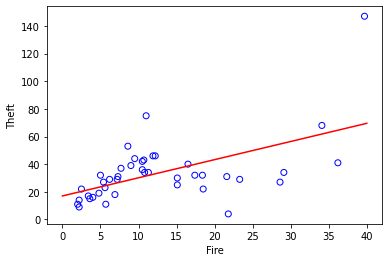

In [17]:
# Draw a scatter plot
plt.scatter(x, y, marker='o', edgecolors='b', facecolor='none')

# Draw the linear regression model
coef = reg.coef_
intercept = reg.intercept_
line_x = np.linspace(0, 40, 100)
line_y = coef[0] * line_x + intercept
plt.plot(line_x, line_y, c='red')

plt.xlabel('Fire')
plt.ylabel('Theft')
plt.show()

In [29]:
# Multiple Linear Regression
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/winequality_red.csv', sep=';')
df.head()
print(df.shape) #[1599,12]

(1599, 12)


In [32]:
x = df.iloc[:,:-1].values #앞에 11개가 input
y = df['quality'].values.reshape([-1, 1])

In [36]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #[1,11]
print('Intercept:\n', reg.intercept_, reg.intercept_.shape) # [1,]

Coefficient:
 [[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
  -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
  -4.13653144e-01  9.16334413e-01  2.76197699e-01]]
(1, 11)
Intercept:
 [21.96520845] (1,)


## Wine Quality Prediction

In [58]:
from sklearn.model_selection import KFold

n_splits = 10
kf = KFold(n_splits)
rmse = 0
count=0

for train_idx, valid_idx in kf.split(x): #10등분을했기에 10번돈다.
    x_train, x_valid = x[train_idx], x[valid_idx] #x_train:[1439,11], x_valid:[160,11]
    y_train, y_valid = y[train_idx], y[valid_idx]
pass

x_train.reshape([-1,1])
x_valid.reshape([-1,1])

reg1 = LinearRegression().fit(x_train, y_train)
print('Coefficient:\n', reg1.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg1.intercept_)

reg1_predict = reg1.predict(x_valid)
error = reg1_predict - y_valid
rmse += np.sqrt(np.sum(error**2)/len(y_valid))
print(rmse)


Coefficient:
 [[ 2.94489656e-02 -1.04623687e+00 -1.25281106e-01  1.68974350e-02
  -1.77355995e+00  3.78806203e-03 -3.52088847e-03 -2.25649954e+01
  -2.56033148e-01  8.85862152e-01  2.67339487e-01]]
Intercept:
 [26.17188192]
0.6985130757721051


In [ ]:
print(rmse)

0.0
